In [4]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE

In [5]:
movieD = pd.read_csv('Data cleaning/allCleanedMovieData.csv')
movieDB = movieD.drop("Unnamed: 0",axis=1)
movieDB.head()

,id,original_title,budget,revenue,release_date,popularity.1,vote_average,runtime,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,percentage_revenue,Won
0,5,Four Rooms,4000000.0,4257354.0,1995.0,22.784,5.744,98.0,32.033857,362.055,36.681,15.715714,225.920,27.939,106.43,False
1,6,Judgment Night,21000000.0,12136938.0,1993.0,11.530,6.543,109.0,14.834857,124.008,23.049,3.600143,32.165,5.436,57.79,False
2,11,Star Wars,11000000.0,775398007.0,1977.0,86.624,8.207,121.0,17.367714,297.868,37.206,7.543000,121.872,10.994,7049.07,True
3,12,Finding Nemo,94000000.0,940335536.0,2003.0,99.340,7.824,100.0,23.006429,467.094,41.251,8.758000,404.117,14.186,1000.36,True
4,13,Forrest Gump,55000000.0,677387716.0,1994.0,68.192,8.481,142.0,32.837571,526.057,99.618,6.422000,224.432,11.735,1231.61,True


In [6]:
won = pd.DataFrame(movieDB['Won'])
multi = pd.DataFrame(movieDB[['runtime','vote_average','casts_popularity_sum','crews_popularity_sum','release_date']])

In [7]:
x_train,x_test,y_train,y_test = train_test_split(multi,won,test_size=0.2)
y_train.shape

(7689, 1)

In [8]:
y_train.value_counts()

Won  
False    7213
True      476
dtype: int64

In [9]:
ros = RandomOverSampler(random_state=42)
x_train_res, y_train_res = ros.fit_resample(x_train,y_train)
print(y_train_res.value_counts())

Won  
False    7213
True     7213
dtype: int64


<AxesSubplot:>

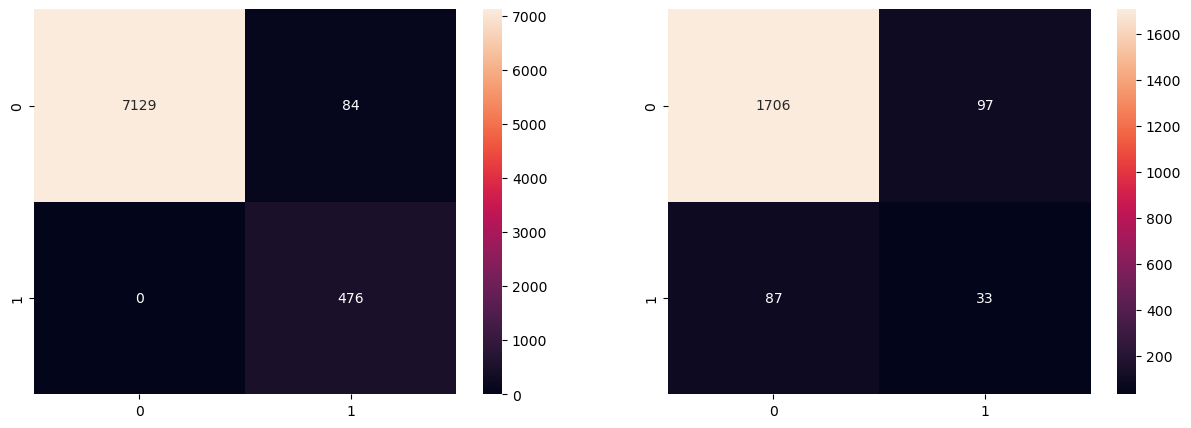

In [10]:
dtree = DecisionTreeClassifier(max_depth=20,random_state=50)
dtree.fit(x_train_res,y_train_res)
train_pred=dtree.predict(x_train)
test_pred = dtree.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,train_pred),annot=True,fmt='d',ax=axes[0])
sb.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt="d",ax=axes[1])

In [11]:
sm = SMOTE(random_state=42) 
x_res,y_res = sm.fit_resample(x_train,y_train)
y_res.value_counts()

Won  
False    7213
True     7213
dtype: int64

Accuracy for train set:  0.993497203797633
Accuracy for test set:  0.8455538221528861


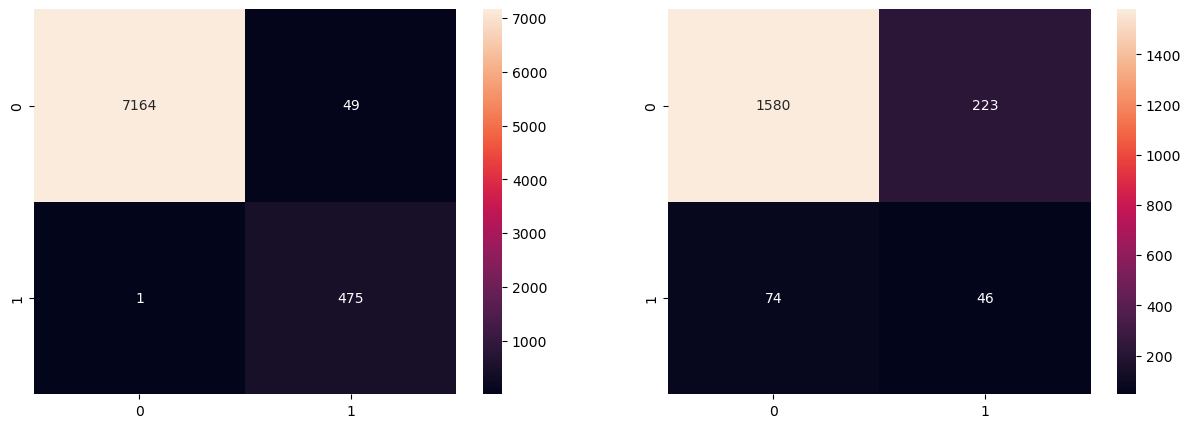

In [12]:
detree = DecisionTreeClassifier(max_depth=20,random_state=50)
detree.fit(x_res,y_res)
train_pred=detree.predict(x_train)
test_pred = detree.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,train_pred),annot=True,fmt='d',ax=axes[0])
sb.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt="d",ax=axes[1])
print("Accuracy for train set: ",detree.score(x_train,y_train))
print("Accuracy for test set: ",detree.score(x_test,y_test))

c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `m

Accuracy for train set:  0.7393679282091299
Accuracy for test set:  0.7316692667706708


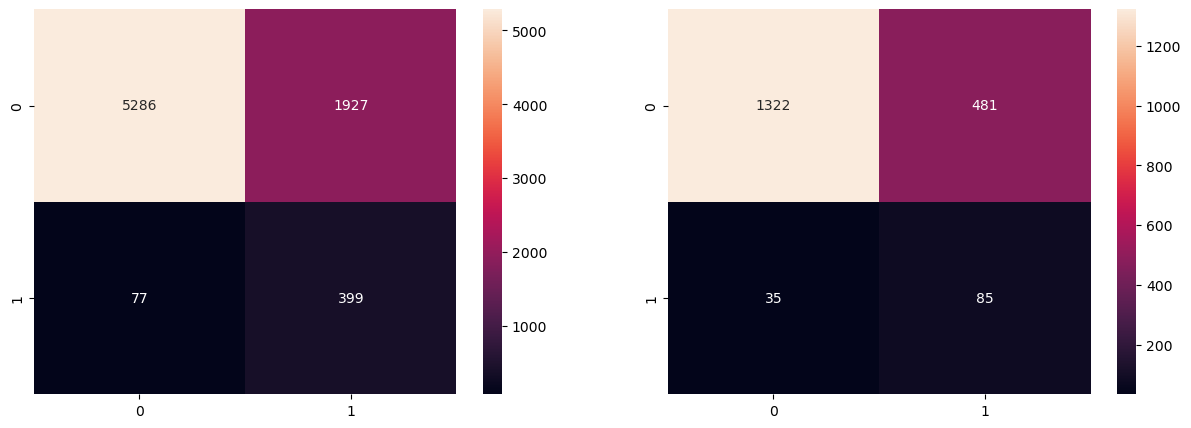

In [24]:
knn = KNeighborsClassifier(n_neighbors = 81)
knn.fit(x_res,y_res)
multi_knn_train_pred = knn.predict(x_train)
multi_knn_test_pred = knn.predict(x_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(y_train,multi_knn_train_pred),annot=True,fmt="d",ax=axes[0])
sb.heatmap(confusion_matrix(y_test,multi_knn_test_pred),annot=True,fmt="d",ax=axes[1])
print("Accuracy for train set: ",knn.score(x_train,y_train))
print("Accuracy for test set: ",knn.score(x_test,y_test))